In [2]:
import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Directory where PF flow PFBs are saved in
directory_out = '/hydrodata/temp/CONUS2_transfers/CONUS2_spinup_WY2003/averages'#'/glade/scratch/tijerina/CONUS2/spinup_WY2003/averages'
organized_dir = './Organized_WTD'#'/glade/p/univ/ucsm0002/CONUS2/Validation/Streamflow/Organized_Daily_Flow'

usgs_data = 'WTD_dataset_national_A_val_Oct_2022.csv' #csv of USGS WTD for October 2002 (WY2003) from Yueling
usgs_metadata_file = 'metadata_WTD_dataset_national_A_val_Oct_2022.csv'
# need to change water year and number of days
water_year = 2003
no_days = 31 

ny = 3256
nx = 4442

### USGS WTD

In [3]:
usgs_metadata = pd.read_csv(usgs_metadata_file, index_col=['site_id'])
usgs_metadata  = usgs_metadata.drop(columns=['Unnamed: 0'])
usgs_metadata

,site_type,agency,site_name,site_id_agency,site_query_url,site_query_access_date,latitude,longitude,state,huc,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
site_id,,,,,,,,,,,,,,,,,,,,,
292338095063601,groundwater well,USGS,KH-65-40-707 (Galveston),292338095063601,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,29.394167,-95.110278,TX,12040204,...,Y,C,YYNYNYYN,S100CSLLWD,112CHCT,U,870.00,1221.0,NaN,4648-00210
292458094534206,groundwater well,USGS,KH-64-33-920 (Texas City Extensometer),292458094534206,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,29.416325,-94.895003,TX,12040204,...,Y,C,YYNYNYYN,S100CSLLWD,112CHCT,M,800.00,NaN,S,8653-00150
292628099401401,groundwater well,USGS,YP-69-35-602 (Frio Reference Well),292628099401401,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,29.446066,-99.664774,TX,12110106,...,Y,C,YYNYNYYN,S500EDRTRN,218EDRDA,U,237.00,237.0,S,8653-CRK51
292943098354404,groundwater well,USGS,AY-68-36-132 (Z DED),292943098354404,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,29.495278,-98.595556,TX,12100301,...,Y,C,YY Y Y,S500EDRTRN,218EDRD,C,596.50,616.0,D,8653-CRN52
293252098380801,groundwater well,USGS,AY-68-27-610 (Parkwood Park),293252098380801,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,29.547778,-98.635556,TX,12100302,...,Y,C,YYNYNYNN,S500EDRTRN,218EDRDA,U,229.00,229.0,S,8653-9BI52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474921093144001,groundwater well,USGS,WLN01 062N23W26CDCDAB01 Togo 000061...,474921093144001,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,47.822467,-93.244069,MN,9030005,...,Y,C,YYNYNYNN,N100GLCIAL,112OTSHS,U,31.66,44.0,S,MN-0022
475439116503401,groundwater well,USGS,53N 04W 28CAB1,475439116503401,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,47.910650,-116.843817,ID,17010305,...,Y,C,YYNYNYYN,N100PCFNWB,112OTSH,U,448.56,449.0,S,ID-00-002
480034105195401,groundwater well,USGS,26N49E13ACAB01 Wolf Point,480034105195401,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-01,48.009364,-105.331008,MT,10060002,...,Y,C,YYNYNYNN,N300UPCTCS,211FHHC,U,180.00,180.0,S,MT076


In [43]:
usgs_csv = pd.read_csv(usgs_data)
usgs_csv

,Unnamed: 0,site_id,date,wtd,num_obs
0,0,292338095063601,2022-10-01,28.681680,31
1,1,292338095063601,2022-10-02,28.693872,31
2,2,292338095063601,2022-10-03,28.703016,31
3,3,292338095063601,2022-10-04,28.706064,31
4,4,292338095063601,2022-10-05,28.712160,31
...,...,...,...,...,...
28741,28741,480550113585001,2022-10-27,2.386584,31
28742,28742,480550113585001,2022-10-28,2.389632,31
28743,28743,480550113585001,2022-10-29,2.386584,31
28744,28744,480550113585001,2022-10-30,2.395728,31


In [44]:
# Use GroupBy() to compute the sum of daily (or all obs within month) wtd observations by site_id
usgs_group_id = usgs_csv.groupby('site_id').sum() # can also use usgs_csv.groupby('site_id')['wtd'].sum()
usgs_group_id  = usgs_group_id.drop(columns=['Unnamed: 0']) #drop unnecessary column name
usgs_group_id.rename(columns = {'wtd':'wtd_sum'}, inplace = True) # rename 'wtd' column to 'wtd_sum' for "monthly sum"
usgs_group_id['num_obs'] = np.sqrt(usgs_group_id['num_obs']) #have to square root the num_obs because these were also summed
usgs_group_id #.to_csv('grouped_usgs_wtd.csv')

,wtd_sum,num_obs
site_id,,
292338095063601,891.735072,31.0
292458094534206,441.752736,31.0
292628099401401,661.979880,31.0
292943098354404,1981.154280,31.0
293252098380801,1996.092528,31.0
...,...,...
474921093144001,211.793328,31.0
475439116503401,3849.300912,31.0
480034105195401,411.159960,31.0


In [45]:
# calcualate "monthly average" by dividing wtd_sum by num_obs (note not all sites have 31 observations)
# Result for 'wtd_avg' is the Monthly Average WTD USGS Observations
usgs_group_id['wtd_avg'] = usgs_group_id['wtd_sum']/usgs_group_id['num_obs']
usgs_group_id

,wtd_sum,num_obs,wtd_avg
site_id,,,
292338095063601,891.735072,31.0,28.765647
292458094534206,441.752736,31.0,14.250088
292628099401401,661.979880,31.0,21.354190
292943098354404,1981.154280,31.0,63.908203
293252098380801,1996.092528,31.0,64.390082
...,...,...,...
474921093144001,211.793328,31.0,6.832043
475439116503401,3849.300912,31.0,124.170997
480034105195401,411.159960,31.0,13.263225


In [46]:
#add lat and long from the metadata
usgs_group_id['latitude'] = usgs_metadata['latitude']
usgs_group_id['longitude'] = usgs_metadata['longitude']

In [47]:
usgs_group_id

,wtd_sum,num_obs,wtd_avg,latitude,longitude
site_id,,,,,
292338095063601,891.735072,31.0,28.765647,29.394167,-95.110278
292458094534206,441.752736,31.0,14.250088,29.416325,-94.895003
292628099401401,661.979880,31.0,21.354190,29.446066,-99.664774
292943098354404,1981.154280,31.0,63.908203,29.495278,-98.595556
293252098380801,1996.092528,31.0,64.390082,29.547778,-98.635556
...,...,...,...,...,...
474921093144001,211.793328,31.0,6.832043,47.822467,-93.244069
475439116503401,3849.300912,31.0,124.170997,47.910650,-116.843817
480034105195401,411.159960,31.0,13.263225,48.009364,-105.331008


In [48]:
usgs_group_id.to_csv(f'{organized_dir}/USGS_Avg_WTD_Oct_WY2003_bySiteID.csv')

### ParFlow WTD

In [75]:
### set up pandas dataframe of gage ID, lat/long, CONUS2 x and y indices ###
pf_wtd_df = np.zeros((no_days, ny, nx))
pf_wtd_df.shape

(31, 3256, 4442)

In [76]:
### READ WTD PFBs ###
# Read in CONUS2 daily WTD PFBs and save as df in wtd_df
for i in range(no_days):
    step = str(int(i+1)).rjust(3, '0')
    pf_wtd_pfb  = np.squeeze(read_pfb(f'{directory_out}/WTD.{water_year}.daily.{step}.pfb'))
    pf_wtd_df[i,...] = pf_wtd_pfb
    print(f'reading WTD for day {step}, {pf_wtd_pfb.shape}')
    

    
# Create column for matching/have flow (=1) and not matching/have no flow (=0) gages
#pf_flow_df['matched'] = np.where(pf_flow_df['day 001']>0, 1, 0)

# remove cells with no flow and make new pandas df with matching flow at CONUS2 cells and USGS gages
#pf_flow_df_NWM_match = pf_flow_df[pf_flow_df.matched != 0]

# SAVE OUT PANDAS DF FOR CONUS2 FLOW
### save csv file of all matching gage locations and CONUS2 daily flow, note the USGS STNID's drop the leading zeros when saving
#pf_flow_df_NWM_match.to_csv(f'{organized_dir}/CONUS2_NWM_matched_flow_{water_year}.csv', sep = ",")

reading WTD for day 001, (3256, 4442)
reading WTD for day 002, (3256, 4442)
reading WTD for day 003, (3256, 4442)
reading WTD for day 004, (3256, 4442)
reading WTD for day 005, (3256, 4442)
reading WTD for day 006, (3256, 4442)
reading WTD for day 007, (3256, 4442)
reading WTD for day 008, (3256, 4442)
reading WTD for day 009, (3256, 4442)
reading WTD for day 010, (3256, 4442)
reading WTD for day 011, (3256, 4442)
reading WTD for day 012, (3256, 4442)
reading WTD for day 013, (3256, 4442)
reading WTD for day 014, (3256, 4442)
reading WTD for day 015, (3256, 4442)
reading WTD for day 016, (3256, 4442)
reading WTD for day 017, (3256, 4442)
reading WTD for day 018, (3256, 4442)
reading WTD for day 019, (3256, 4442)
reading WTD for day 020, (3256, 4442)
reading WTD for day 021, (3256, 4442)
reading WTD for day 022, (3256, 4442)
reading WTD for day 023, (3256, 4442)
reading WTD for day 024, (3256, 4442)
reading WTD for day 025, (3256, 4442)
reading WTD for day 026, (3256, 4442)
reading WTD 

In [77]:
pf_wtd_df.shape

(31, 3256, 4442)

In [78]:
# Calculate Monthly Average WTD for PFCLM
pf_wtd_avg = np.mean(pf_wtd_df, axis = 0)*24 #average ######################## I MULTIPLIED BY 24 Here because I THINK THAT WTD IS ACCUMULATED and I fuked up the initial script

In [79]:
pf_wtd_avg.shape

(3256, 4442)

In [80]:
pf_wtd_avg.max()

7126.156032918245

In [60]:
np.savetxt(f'{organized_dir}/PFCLM_Avg_WTD_Oct_WY2003.csv', pf_wtd_avg, delimiter=",")

In [ ]:
# NEXT STEPS:
# find the CONUS2 indices that correspond to each site id
# USGS - find CONUS2 indices that have multiple sites in a grid cell and average these... save these as CONUS2 indices???
# PFCLM - locate and save the WTD at CONUS2 indices that correspond to sites
# Compare!

In [81]:
# Read in the USGS sites that have been matched to the CONUS2 x and y (Find_CONUS2_indices_WTD.ipynb)
usgs_conus_xy = pd.read_csv('../../Coordinates_to_Indices/USGS_sites_CONUS2_indices_WTD.csv', index_col=['site_id'])

In [82]:
usgs_conus_xy

,CONUS_y,CONUS_x
site_id,,
292338095063601,510,2391
292458094534206,513,2412
292628099401401,518,1949
292943098354404,521,2053
293252098380801,527,2049
...,...,...
474921093144001,2516,2478
475439116503401,2695,793
480034105195401,2561,1610


In [83]:
# Join the USGS average WTD dataframe with the CONUS2 x and y
usgs_conus_join = usgs_group_id.join(usgs_conus_xy)
usgs_conus_join

,wtd_sum,num_obs,wtd_avg,latitude,longitude,CONUS_y,CONUS_x
site_id,,,,,,,
292338095063601,891.735072,31.0,28.765647,29.394167,-95.110278,510,2391
292458094534206,441.752736,31.0,14.250088,29.416325,-94.895003,513,2412
292628099401401,661.979880,31.0,21.354190,29.446066,-99.664774,518,1949
292943098354404,1981.154280,31.0,63.908203,29.495278,-98.595556,521,2053
293252098380801,1996.092528,31.0,64.390082,29.547778,-98.635556,527,2049
...,...,...,...,...,...,...,...
474921093144001,211.793328,31.0,6.832043,47.822467,-93.244069,2516,2478
475439116503401,3849.300912,31.0,124.170997,47.910650,-116.843817,2695,793
480034105195401,411.159960,31.0,13.263225,48.009364,-105.331008,2561,1610


In [84]:
# Find the USGS average WTD for sites with more than one site per CONUS2 cell
usgs_by_cell = usgs_conus_join.groupby(['CONUS_y','CONUS_x']).agg({'wtd_avg': 'mean'})
### THIS NEEDS TO BE REDONE BECAUSE IT REMOVES THE SITE ID 


In [85]:
usgs_by_cell = usgs_by_cell.reset_index()
usgs_by_cell

,CONUS_y,CONUS_x,wtd_avg
0,510,2391,28.765647
1,513,2412,14.250088
2,518,1949,21.354190
3,521,2053,63.908203
4,527,2049,64.390082
...,...,...,...
888,2710,334,9.065145
889,2722,4191,4.501994
890,2758,367,10.519041
891,2811,4235,2.878787


In [86]:
result = pf_wtd_avg[usgs_by_cell['CONUS_y'],usgs_by_cell['CONUS_x']]

In [87]:
result.shape

(893,)

In [88]:
usgs_pf_WTD_avg = usgs_by_cell
usgs_pf_WTD_avg['pf_avg_wtd'] = result.tolist()
usgs_pf_WTD_avg.drop(usgs_pf_WTD_avg[usgs_pf_WTD_avg['wtd_avg']<0].index, inplace=True)

In [89]:
usgs_pf_WTD_avg

,CONUS_y,CONUS_x,wtd_avg,pf_avg_wtd
0,510,2391,28.765647,12.985437
1,513,2412,14.250088,4.189742
2,518,1949,21.354190,2.254804
3,521,2053,63.908203,192.009831
4,527,2049,64.390082,6.156285
...,...,...,...,...
888,2710,334,9.065145,4.205704
889,2722,4191,4.501994,7.789055
890,2758,367,10.519041,328.459436
891,2811,4235,2.878787,0.000000


Text(0.5, 1.0, 'Monthly mean WTD comparison, October WY2003 (cms)')

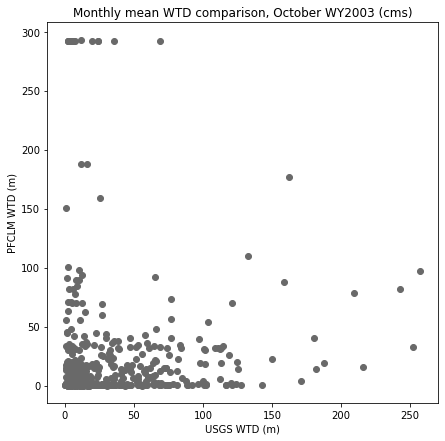

In [57]:
# Scatter plot of daily mean flow for October WY2003, PF vs. USGS
fig = plt.figure(figsize=(7,7), dpi=72)
ax = fig.add_subplot()

ax.scatter(usgs_pf_WTD_avg['wtd_avg'], usgs_pf_WTD_avg['pf_avg_wtd'], color = 'dimgrey')
plt.ylabel('PF-CONUS2 WTD (m)')#,fontsize=18
plt.xlabel('USGS WTD (m)')#,fontsize=18
plt.title('Monthly mean WTD comparison, October WY2003 (m)')#,fontsize=20